In [1]:
import cv2
from sklearn.preprocessing import normalize
from PIL import Image
from tf_unet import unet
from tf_unet import util

In [2]:
import json
import matplotlib.pyplot as plt
from numpy import array, zeros
from scipy.misc import imread
from glob import glob

# load the images
files = sorted(glob('neurofinder.00.00/images/*.tiff'))

imgs = array([imread(f) for f in files])
dims = imgs.shape[1:]

# load the regions (training data only)
with open('neurofinder.00.00/regions/regions.json') as f:
    regions = json.load(f)

mask = zeros(dims)
print(mask.shape)

for s in regions:
    for (i,j) in s['coordinates']:
        mask[i,j]= 1

"""
def tomask(coords):
    
    mask[zip(*coords)] = 1
    return mask 

masks = array([tomask(s['coordinates']) for s in regions])
"""


# show the outputs
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(imgs.sum(axis=0), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.show()

/home/local/AIUGA/jeremyshi/miniconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


(512, 512)


In [3]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [5]:
import scipy.misc

for i in range(0,imgs.shape[0]):
    scipy.misc.imsave('newdata/train/'+str(i)+'.tif', imgs[i])
    scipy.misc.imsave('newdata/train/'+str(i)+'_mask.tif', mask)
#     /media/data2TB/jeremyshi/neurofinder.{}/images/

/home/local/AIUGA/jeremyshi/miniconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.
/home/local/AIUGA/jeremyshi/miniconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


In [6]:
data_provider = image_util.ImageDataProvider('newdata/train/*.tif')

Number of files used: 3024


In [7]:
net = unet.Unet(channels=1, n_class=2, layers=3, features_root=16)

2018-03-03 20:26:30,624 Layers 3, features 16, filter size 3x3, pool size: 2x2


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



2018-03-03 20:26:31,038 From /home/local/AIUGA/jeremyshi/.local/lib/python2.7/site-packages/tf_unet-0.1.1-py2.7.egg/tf_unet/unet.py:229: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



Instructions for updating:
keep_dims is deprecated, use keepdims instead


2018-03-03 20:26:31,299 From /home/local/AIUGA/jeremyshi/.local/lib/python2.7/site-packages/tf_unet-0.1.1-py2.7.egg/tf_unet/layers.py:63: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [9]:
path = trainer.train(data_provider, "./unet_trained", training_iters=20, epochs=10, display_step=2)

2018-03-03 20:26:31,814 Removing '/home/local/AIUGA/jeremyshi/neuron/prediction'
2018-03-03 20:26:31,816 Removing '/home/local/AIUGA/jeremyshi/neuron/unet_trained'
2018-03-03 20:26:31,830 Allocating '/home/local/AIUGA/jeremyshi/neuron/prediction'
2018-03-03 20:26:31,831 Allocating '/home/local/AIUGA/jeremyshi/neuron/unet_trained'
2018-03-03 20:26:33,348 Verification error= 9.6%, loss= 0.6275
2018-03-03 20:26:33,784 Start optimization
2018-03-03 20:26:35,472 Iter 0, Minibatch Loss= 0.5351, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018-03-03 20:26:37,683 Iter 2, Minibatch Loss= 0.3657, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018-03-03 20:26:39,894 Iter 4, Minibatch Loss= 0.3186, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018-03-03 20:26:42,190 Iter 6, Minibatch Loss= 0.3186, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018-03-03 20:26:44,416 Iter 8, Minibatch Loss= 0.3186, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018-03-03 20:26:46,614 Iter 10, Mini

2018-03-03 20:29:11,533 Iter 132, Minibatch Loss= 0.3348, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018-03-03 20:29:13,770 Iter 134, Minibatch Loss= 0.3146, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018-03-03 20:29:16,038 Iter 136, Minibatch Loss= 0.3074, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018-03-03 20:29:18,314 Iter 138, Minibatch Loss= 0.3058, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018-03-03 20:29:19,253 Epoch 6, Average loss: 0.3137, learning rate: 0.1470
2018-03-03 20:29:20,572 Verification error= 9.6%, loss= 0.3062
2018-03-03 20:29:22,242 Iter 140, Minibatch Loss= 0.3058, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018-03-03 20:29:24,466 Iter 142, Minibatch Loss= 0.3056, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018-03-03 20:29:26,782 Iter 144, Minibatch Loss= 0.3051, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018-03-03 20:29:28,942 Iter 146, Minibatch Loss= 0.3054, Training Accuracy= 0.9040, Minibatch error= 9.6%
2018

In [19]:
x_test, y_test = data_provider(1)

In [20]:
prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2018-03-03 20:34:52,575 Restoring parameters from ./unet_trained/model.cpkt
2018-03-03 20:34:52,645 Model restored from file: ./unet_trained/model.cpkt


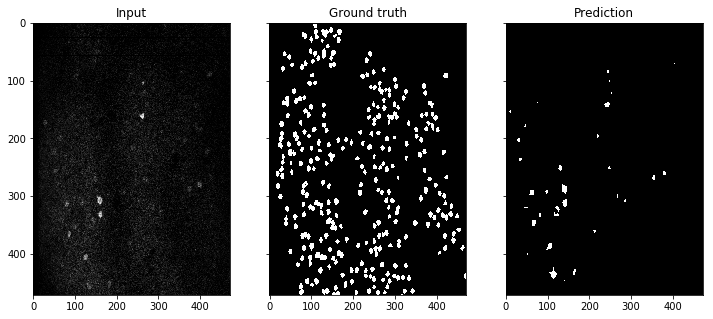

In [21]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto",cmap='gray')
ax[1].imshow(y_test[0,...,1], aspect="auto",cmap='gray')
mask = prediction[0,...,1] > 0.225
ax[2].imshow(mask, aspect="auto",cmap='gray')
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
plt.show()

In [22]:
print(prediction.shape)

(1, 472, 472, 2)


((472, 472, 2), (472, 472))
[[0.90839076 0.90764225 0.90766311 ... 0.90435302 0.90534461 0.90522563]
 [0.90746796 0.90561461 0.90635574 ... 0.90253973 0.904109   0.90116012]
 [0.90903771 0.90820503 0.90684962 ... 0.90484488 0.90429187 0.90394545]
 ...
 [0.89132464 0.89052808 0.89365137 ... 0.90115201 0.90345395 0.89982176]
 [0.894835   0.8951807  0.89473307 ... 0.90310729 0.90349305 0.90255058]
 [0.89393985 0.89502621 0.89535964 ... 0.90110636 0.90252662 0.90165722]]


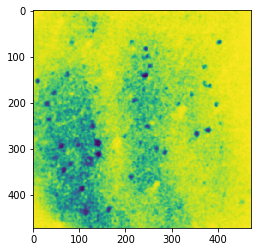

In [65]:
result = zeros((472,472))

some = prediction[0]
print (some.shape, result.shape)
for i in range(0,472):
    for j in range(0,472):
        class1,class2 = some[i,j,:]
#         print(class1,class2)
#         if(class1>class2):
#             result[i][j] = 0
#         else:
#             result[i][j] = 1
#             print ('bad')
        result[i][j] = class1 - class2
            
print(result)            
plt.imshow(result)
plt.show()

In [40]:
someNew = prediction[0, :, :, 0]

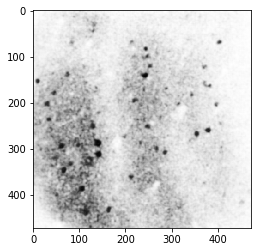

In [61]:
            
plt.imshow(someNew,cmap='gray')
plt.show()

In [73]:
import numpy as np
someNew
print (np.mean(np.mean(someNew, axis=1)))

0.9127226


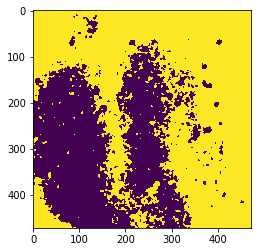

In [75]:
new = zeros((472,472))
for i in range(0, 472):
    for j in range(0, 472):
        if someNew[i][j] > (np.median(np.median(someNew, axis=1))):
            new[i][j] = 1
        else:
            new[i][j] = 0
plt.imshow(new)